<a href="https://colab.research.google.com/github/jhbellingrath/CS-290-Classwork/blob/main/notebooks/k_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def dist(X,Y):
  total=0
  for i in range(len(X)):
    total+=(X[i]-Y[i])**2
  return np.sqrt(total)

In [ ]:
df = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")
df=df.drop(columns=["species"]) #dropping all of the categorical variables
df=df.drop(columns=["sex"])
df=df.drop(columns=["island"])
df=df.drop(columns=["year"])
df=df.drop(3) #getting rid of the NaNs
df=df.drop(271)
df=df.reset_index(drop=True)

In [ ]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [ ]:
def avg(X): ##inputs a list,X
  averages=[]
  for i in range(len(df.iloc[0])): #loops through the attributes
    sum=0
    for j in range(len(X)): #loops through the terms in the list
      sum+=df.iloc[X[j]][i]
    if(len(X)==0):
      averages.append(0)
    else:
      averages.append(sum/len(X))
  return averages

In [ ]:
def make_clusters(df,centroids):
  clusters=[]
  for i in range(k): #makes the initial empty cluster lists
    clusters.append([])
  for i in range(len(df)):
    index=0  ##stores which cluster the datapoints will be included in
    best=np.Infinity
    for j in range(len(centroids)):
      if(dist(centroids[j],df.iloc[i])<best):
        index=j
        best=dist(centroids[j],df.iloc[i])
    clusters[index].append(i)
  return clusters

In [ ]:
def make_plot(df,clusters):
  dftemp=df.copy()
  dftemp["target"]=dftemp.index
  dftemp["target"]=dftemp["target"].apply(catagorize)
  plt.figure(figsize=(5, 3))
  sns.scatterplot( x = "bill_length_mm", y = "flipper_length_mm", data = dftemp, hue = "target")
  centroidsx=[]
  centroidsy=[]
  for i in range(len(centroids)):
    centroidsx.append(centroids[i][0])
    centroidsy.append(centroids[i][2])
  sns.scatterplot( x = centroidsx, y = centroidsy, c = "black", marker="X", s = 100)

In [ ]:
def catagorize(x):
  if(x in clusters[0]):
    return "green"
  if(x in clusters[1]):
    return "red"
  if(x in clusters[2]):
    return "blue"
  else:
    return "black"

In [ ]:
def k_mean(df):
  initials=[]
  initials=np.random.randint(0,len(df),k)
  centroids=[]
  for i in range(len(initials)): ##creates initial centroid list
    temp=[]
    for j in range(len(df.iloc[0])):
      temp.append(df.iloc[initials[i]][j])
    centroids.append(temp)
  while(1>0):
    clusters=make_clusters(df,centroids)
    ##at this point each of the datapoints is in a cluster
    for i in range(k):
      #making the plot
      #make_plot(df,clusters)
      centroids[i]=avg(clusters[i])
    if(centroids[i]==avg(clusters[i])):
        break
  return [centroids,inertia(df,clusters,centroids)]

In [ ]:
clusters=[]
k=3
k_mean(df)

<ipython-input-133-3936e2d05d65>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(df.iloc[initials[i]][j])
<ipython-input-119-1df5cbdfdc2e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=(X[i]-Y[i])**2
<ipython-input-122-91275111ec14>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum+=df.iloc[X[j]][i]


[[[38.61764705882354,
   17.261764705882356,
   186.05882352941177,
   3080.8823529411766],
  [45.390517241379314,
   16.84698275862069,
   206.69827586206895,
   4599.353448275862],
  [41.811842105263146,
   18.03026315789474,
   189.9078947368421,
   3489.4736842105262]],
 101410378.67741653]

In [ ]:
def accuracy(df,clusters):


In [ ]:
def inertia(df,clusters,centroids):
  inert=0
  for i in range(len(centroids)):
    for j in range(len(clusters[i])):
      inert+=dist(centroids[i],df.iloc[clusters[i][j]])**2
  return inert

<ipython-input-96-3936e2d05d65>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(df.iloc[initials[i]][j])
<ipython-input-88-1df5cbdfdc2e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=(X[i]-Y[i])**2
<ipython-input-92-91275111ec14>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum+=df.iloc[X[j]][i]


<Axes: >

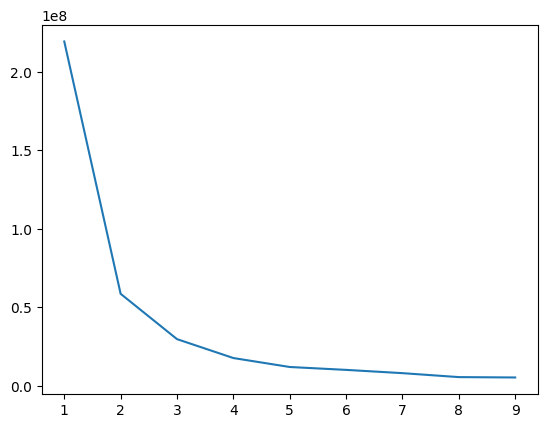

In [ ]:
ks=[]
inertias=[]
for i in range(1,10):
  k=i
  ks.append(k)
  temp=[]
  for j in range(10):
    temp.append(k_mean(df)[1])
  temp.sort()
  inertias.append(temp[0])
sns.lineplot( x = ks, y = inertias)